# Assignment - 4

In [1]:
# importing libraries
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

1. Consider the discrete time periodic signal of period N = 20 as given below:

                               x[n] = 1, −2 ≤ n ≤ 2
                                      0, otherwise                  ...............(1)
                        
   where n is the discrete time sequence.

   (a) Plot the sequence x[n] for 4 time periods.

In [34]:
# Function for x[n].
def x_n(LL,UL,n):
    out = []
    for j in n:
        if (j>=LL) and (j<=UL):
            out.append(1)
        else:
            out.append(0)
    return out

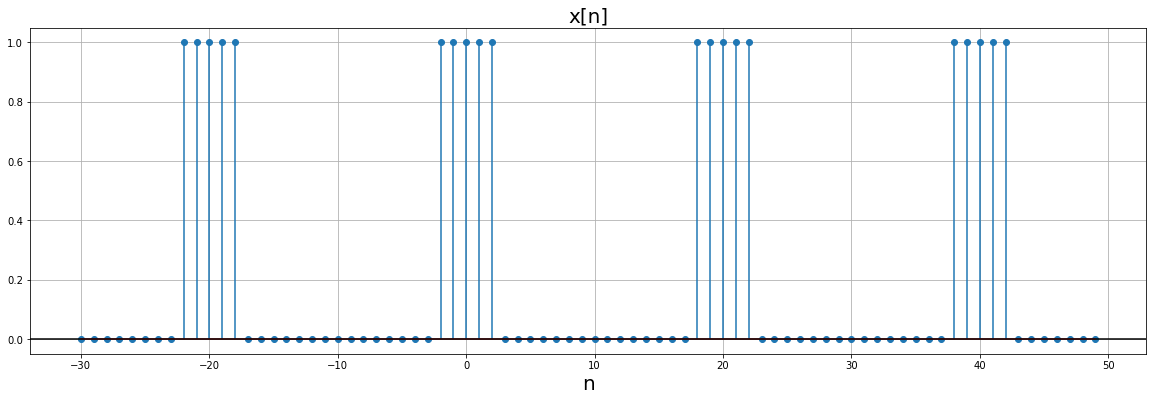

In [35]:
# Plot of x[n] sequence.
%matplotlib inline
plt.subplots(figsize=(20,6))
LL = -2
UL = 2
t = 4
n1 = np.arange(-10,10,1)
o = []
for i in range(t):
    o.append(x_n(LL,UL,n1))
output = o[0]+o[1]+o[2]+o[3]
n2 = np.arange(-30,50,1)
plt.stem(n2,output)
plt.xlabel('n',fontsize=20)
plt.title('x[n]',fontsize=20)
plt.axhline(color = "Black");
plt.grid()

(b) Determine and plot the magnitude, |ck| and phase coefficients, ∠ck of discrete time Fourier series (DTFS) of x[n].

In [40]:
# Function for discrete time fourier series coefficients.
def DTFS(x):
    N = len(x)
    out = []
    for k in range(N):
        c = 0
        for n in range(N):
            c+=((x[n]*np.exp(-2j*np.pi*k*n/N))/N)
        out.append(c)
    return out

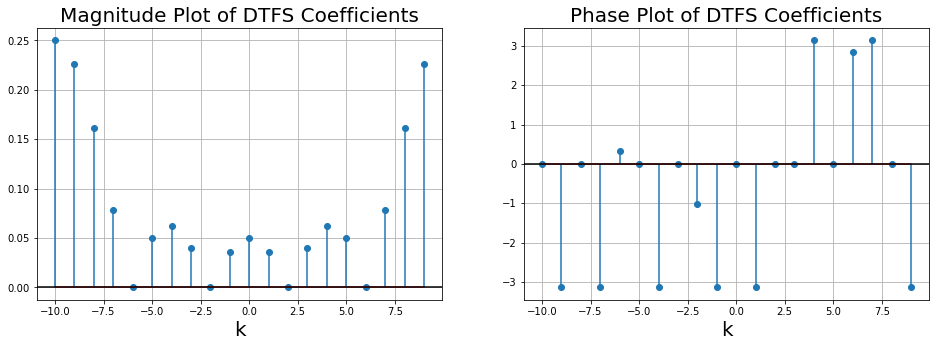

In [45]:
# Plot of discrete time fourier series coefficients c[k].
%matplotlib inline
fig,axes = plt.subplots(1,2,figsize=(16,5))

LL = -2
UL = 2
n3 = np.arange(-10,10,1)
x = x_n(LL,UL,n3)
C_k = DTFS(x)

# Magnitude plot of c[k].
axes[0].stem(n3,np.absolute(C_k))
axes[0].set_xlabel('k',fontsize=20)
axes[0].set_title('Magnitude Plot of DTFS Coefficients',fontsize=20)
axes[0].axhline(color = "Black");
axes[0].grid()

#Phase plot of c[k].
axes[1].stem(n3,np.angle(C_k))
axes[1].set_xlabel('k',fontsize=20)
axes[1].set_title('Phase Plot of DTFS Coefficients',fontsize=20)
axes[1].axhline(color = "Black");
axes[1].grid()

2. For x[n] in Question 1, the reconstructed signal is given by

                         xˆ[n] = ∑ k=-M........k=M  c[k]e^(jk(2π/N)n)       ................(2)

   (a) Reconstruct x[n] from 5 DTFS coefficients (i.e., M = 2) and plot the original signal (x[n]) and the reconstructed signal (ˆx[n]).

In [6]:
# Function of reconstruction of x[n].
def xn(c,M):
    N = len(c)
    out = []
    for n in range(N):
        x = 0
        for k in range(M):
            x+=(c[k]*np.exp(2j*np.pi*k*n/N))
        out.append(x)
    return out

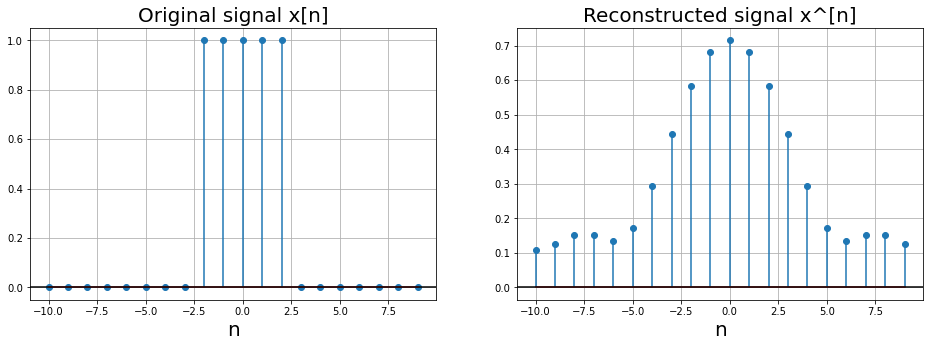

In [7]:
# Plot of original signal x[n] and reconstructed signal x^[n].
%matplotlib inline
fig,axes = plt.subplots(1,2,figsize=(16,5))

n4 = np.arange(-10,10,1)

# Plot of original signal x[n].

LL = -2
UL = 2
x = x_n(LL,UL,n4)

axes[0].stem(n4,x)
axes[0].set_xlabel('n',fontsize=20)
axes[0].set_title('Original signal x[n]',fontsize=20)
axes[0].axhline(color = "Black");
axes[0].grid()

# Plot of reconstructed signal x^[n].

M = 2
N = 2*M+1
C_k = DTFS(x)
X_n = xn(C_k,N)

axes[1].stem(n4,np.absolute(X_n))
axes[1].set_xlabel('n',fontsize=20)
axes[1].set_title('Reconstructed signal x^[n]',fontsize=20)
axes[1].axhline(color = "Black");
axes[1].grid()

(b) Reconstruct x[n] from 11 DTFS coefficients (i.e., M = 5) and plot the original signal (x[n]) and the reconstructed signal (ˆx[n]).

Explain your observations.

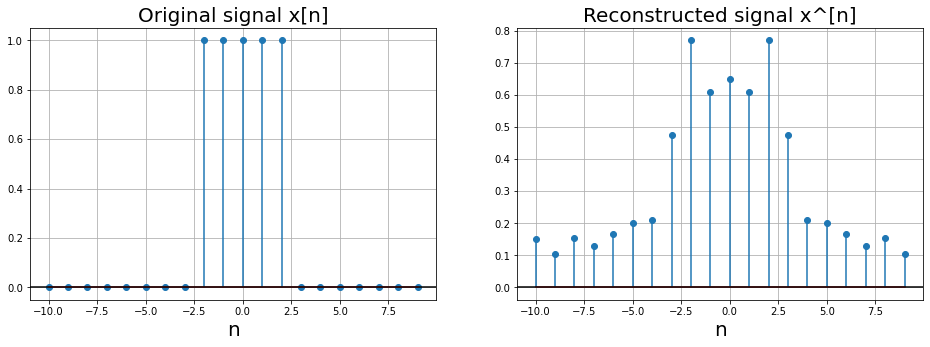

In [8]:
# Plot of original signal x[n] and reconstructed signal x^[n].
%matplotlib inline
fig,axes = plt.subplots(1,2,figsize=(16,5))

n5 = np.arange(-10,10,1)

# Plot of original signal x[n].

LL = -2
UL = 2
x = x_n(LL,UL,n5)

axes[0].stem(n5,x)
axes[0].set_xlabel('n',fontsize=20)
axes[0].set_title('Original signal x[n]',fontsize=20)
axes[0].axhline(color = "Black");
axes[0].grid()

# Plot of reconstructed signal x^[n].

M = 5
N = 2*M +1
C_k = DTFS(x)
X_n = xn(C_k,N)

axes[1].stem(n5,np.absolute(X_n))
axes[1].set_xlabel('n',fontsize=20)
axes[1].set_title('Reconstructed signal x^[n]',fontsize=20)
axes[1].axhline(color = "Black");
axes[1].grid()

# Observation :-

### If we increase the number of DTFS coefficients then the output reconstructed signal is approximately equal to the original signal.

3. In the context of discrete time Fourier series, for a discrete time signal x[n], the Parseval’s relation is given by

                          1/N ∑ n=<N> |x[n]|^2 = ∑ k=<N> |ck|^2   ................(3)
                 
   (a) If x[n] = 1+ sin (2πn/N)+3 cos (2πn/N) (with time period, N = 8), plot x[n] and the magnitude of DTFS coefficients of x[n].

In [9]:
# Function for x[n].
def X(n,N):
    x = []
    for i in n:
        x.append(1 + np.sin(2*np.pi*i/N) + 3*np.cos(2*np.pi*i/N))
    return x

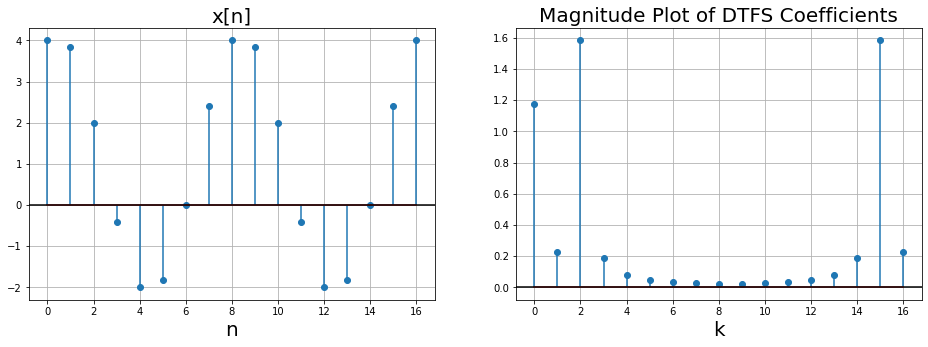

In [48]:
# Plot for function x[n].
%matplotlib inline
fig,axes = plt.subplots(1,2,figsize=(16,5))

n6 = np.arange(0,17,1)

# Plot of original signal x[n].

N = 8
out = X(n6,N)

axes[0].stem(n6,out)
axes[0].set_xlabel('n',fontsize=20)
axes[0].set_title('x[n]',fontsize=20)
axes[0].axhline(color = "Black");
axes[0].grid()

# Plot of reconstructed signal x^[n].

dtfs_x = DTFS(out)

axes[1].stem(n6,np.absolute(dtfs_x))
axes[1].set_xlabel('k',fontsize=20)
axes[1].set_title('Magnitude Plot of DTFS Coefficients',fontsize=20)
axes[1].axhline(color = "Black");
axes[1].grid()

(b) Verify the Parseval’s relation for x[n]

6.588235294117645
6.588235294117656


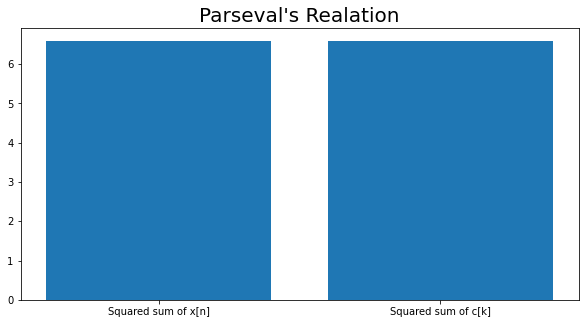

In [53]:
%matplotlib inline
fig = plt.figure(figsize = (10, 5))

N = len(out)
square_sum_x_n = sum(np.square(out))/N
square_sum_c_k = sum(np.square(np.absolute(dtfs_x)))
print(square_sum_x_n)
print(square_sum_c_k)

# creating the dataset
data = {'Squared sum of x[n]':square_sum_x_n, 'Squared sum of c[k]':square_sum_c_k}
names = list(data.keys())
values = list(data.values())
 
# creating the bar plot
plt.bar(names, values)

plt.title("Parseval's Realation",fontsize = 20)
plt.show()

4. Compute the Fourier transform X(ejω) of the signal x[n] shown in Fig.1 and plot its magnitude and phase over the interval ω ∈ [−π, π].

In [12]:
# Function for fourier transform.
def DTFT(x,omega):
    n = len(x)
    dtft = 0
    for i in range(n):
        dtft+=x[i]*(np.exp(-1j*omega*i))
    return dtft

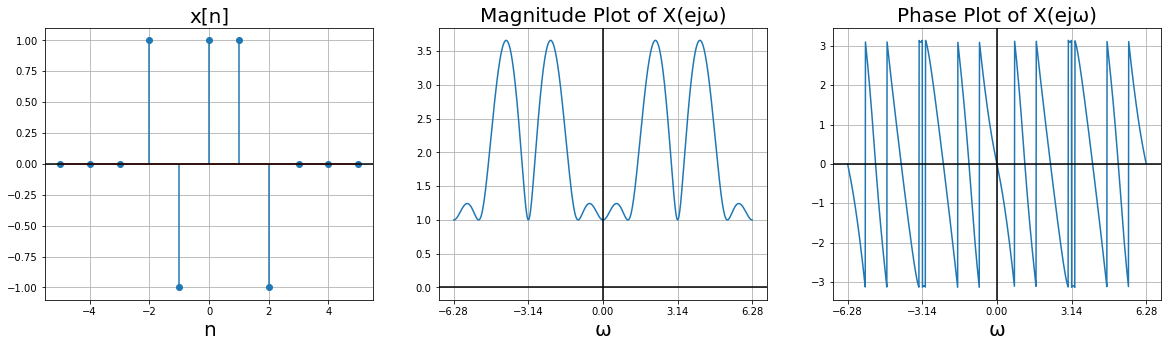

In [13]:
%matplotlib inline
fig,axes = plt.subplots(1,3,figsize=(20,5))

# Plot of x[n].

n7 = np.arange(-5,6,1)
X_N = [0,0,0,1,-1,1,1,-1,0,0,0]

axes[0].stem(n7,X_N)
axes[0].set_xlabel('n',fontsize=20)
axes[0].set_title('x[n]',fontsize=20)
axes[0].axhline(color = "Black");
axes[0].grid()

# Plot of fourier transform of x[n].

omega = np.arange(-2*np.pi,2*np.pi,0.01)
X_om = DTFT(X_N,omega)

# Magnitude plot of fourier transform of x[n].

axes[1].plot(omega,np.absolute(X_om))
axes[1].set_xlabel('ω',fontsize=20)
axes[1].set_title('Magnitude Plot of X(ejω)',fontsize=20)
axes[1].axhline(color = "Black")
axes[1].axvline(color = "Black")
axes[1].set_xticks([-2*np.pi,-np.pi,0,np.pi,2*np.pi])
axes[1].grid()

# Magnitude plot of fourier transform of x[n].

axes[2].plot(omega,np.angle(X_om))
axes[2].set_xlabel('ω',fontsize=20)
axes[2].set_title('Phase Plot of X(ejω)',fontsize=20)
axes[2].axhline(color = "Black")
axes[2].axvline(color = "Black")
axes[2].set_xticks([-2*np.pi,-np.pi,0,np.pi,2*np.pi])
axes[2].grid()

5. Given an LTI system with impulse response h[n] = u[n] and an input x[n] = (0.8)nu[n], compute the DTFT of the output Y (ejω) and its inverse DTFT y[n].

In [14]:
# function to generate unit step sequence h[n].
def h(a,c,n):
    unit =[]
    for sample in n:
        if sample < c:
            unit.append(0)
        else:
            unit.append(a)
    return unit

In [15]:
# function to generate unit step sequence x[n].
def x_n_1(a,c,n):
    unit =[]
    for sample in n:
        if sample < c:
            unit.append(0)
        else:
            unit.append(a*sample)
    return unit

In [16]:
# function to convolute the two sequence.
def convolution(x1,x2):
    result = []
    x3 = []
    for i in range(len(x2)):
        x3.append(x1*x2[i])
    temp = len(x3)
    for i in range(len(x3)):
        for j in range(len(x3)-1-i):
            x3[i] = np.insert(x3[i],len(x3[i]),0)
    for i in range(len(x3)):
        for j in range(i):
            x3[i] = np.insert(x3[i],0,0)
    for i in range(len(x3[0])):
        add = 0
        for j in range(len(x3)):
            add+=x3[j][i]
        result.append(add)
    return result

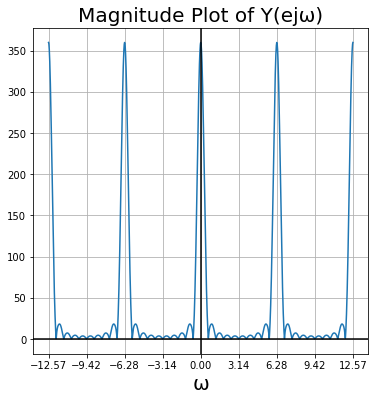

In [17]:
# Plot for DTFT Y(ejω) and inverse DTFT of y[n].
%matplotlib inline
fig = plt.subplots(figsize=(6,6))

n8 = np.arange(-10,10,1)

# Generating signal h[n].
a1 = 1
c1 = 0
h_n = h(a1,c1,n8)

# Generating dignal x[n].
a2 = 0.8
c2 = 0
x_n = x_n_1(a2,c2,n8)

# Computing siganl y[n].
y = convolution(np.array(x_n),np.array(h_n))

# Plot of DTFT of y[n].

omega = np.arange(-4*np.pi,4*np.pi,0.01)
dtft_y = DTFT(y,omega)

plt.plot(omega,np.absolute(dtft_y))
plt.xlabel('ω',fontsize=20)
plt.title('Magnitude Plot of Y(ejω)',fontsize=20)
plt.axhline(color = "Black")
plt.axvline(color = "Black")
plt.xticks([-4*np.pi,-3*np.pi,-2*np.pi,-np.pi,0,np.pi,2*np.pi,3*np.pi,4*np.pi])
plt.grid()

6. Use the DFT to compute approximately the first 64 Fourier coefficients of the function
                
                        f(t) = e−t^2/10 [sin2t + 2*cos4t + 0.4*sint*sin10t]    ..............(4)
                        
   on the interval [0, 2π].
   
   (a) Plot f(t).

In [18]:
# Function for f(t).
def f_t(t):
    out = []
    for i in t:
        f1 = np.sin(2*i)
        f2 = 2*np.cos(4*i)
        f3 = 0.4*np.sin(i)*np.sin(10*i)
        f4 = np.exp(-(i**2)/10)
        out.append(f4*(f1+f2+f3))
    return out

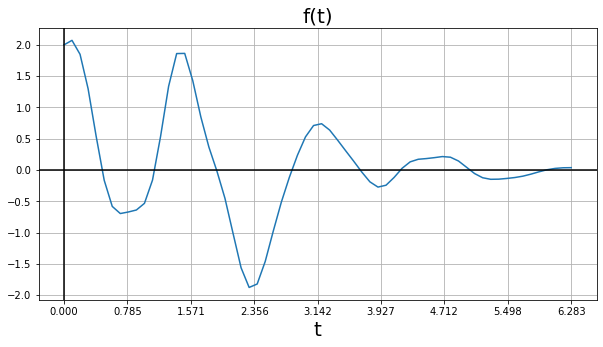

In [49]:
# Plot of f(t).
%matplotlib inline
fig = plt.figure(figsize = (10, 5))

N = 64
t = np.linspace(0,2*np.pi,64)
f = f_t(t)
plt.plot(t,f)
plt.xlabel('t',fontsize=20)
plt.title('f(t)',fontsize=20)
plt.axhline(color = "Black");
plt.axvline(color = "Black");
plt.xticks([0,0.25*np.pi,0.5*np.pi,0.75*np.pi,np.pi,1.25*np.pi,1.5*np.pi,1.75*np.pi,2*np.pi])
plt.grid()

(b) Compute the coefficients and plot them. Use the following transformation to compute DFT:

                                        Y = W*f

In [50]:
# Creating transformation matrix W.
N = 64
W = np.zeros((N,N),dtype=complex)
for n in range(N):
    for k in range(N):
        W[n][k] = np.exp(-2j*np.pi*n*k/N)

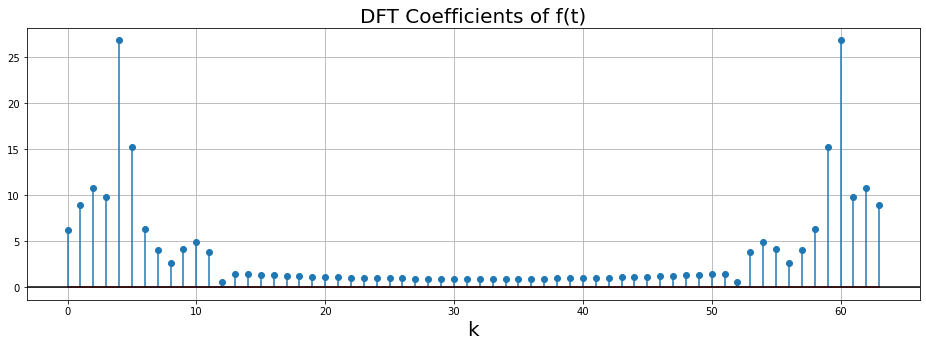

In [51]:
# Plot of DFT coefficients.
%matplotlib inline
fig = plt.subplots(figsize=(16,5))

n10 = np.arange(0,N,1)

# Calculating DFT coefficients.
F_T = np.reshape(f,(N,1))
Y = np.dot(W,F_T)

# Plot
plt.stem(n10,np.absolute(Y))
plt.xlabel('k',fontsize=20)
plt.title('DFT Coefficients of f(t)',fontsize=20)
plt.axhline(color = "Black");
plt.grid()

7. x[n] is a discrete time sequence given by:

                     x[n] = (-1/3)^n u[n] − (1/2)^n u[−n−1]         ..................(7)

   where n is the discrete time sequence and u[n] is the unit step sequence.

(a) Find the Z-transform of x[n] denoted by X(z) (calculate manually). Plot x[n], the magnitude and phase spectra of X(z) on 3 different subplots. Also, visualize the real and imaginary parts of X(z) on a 3D plot.

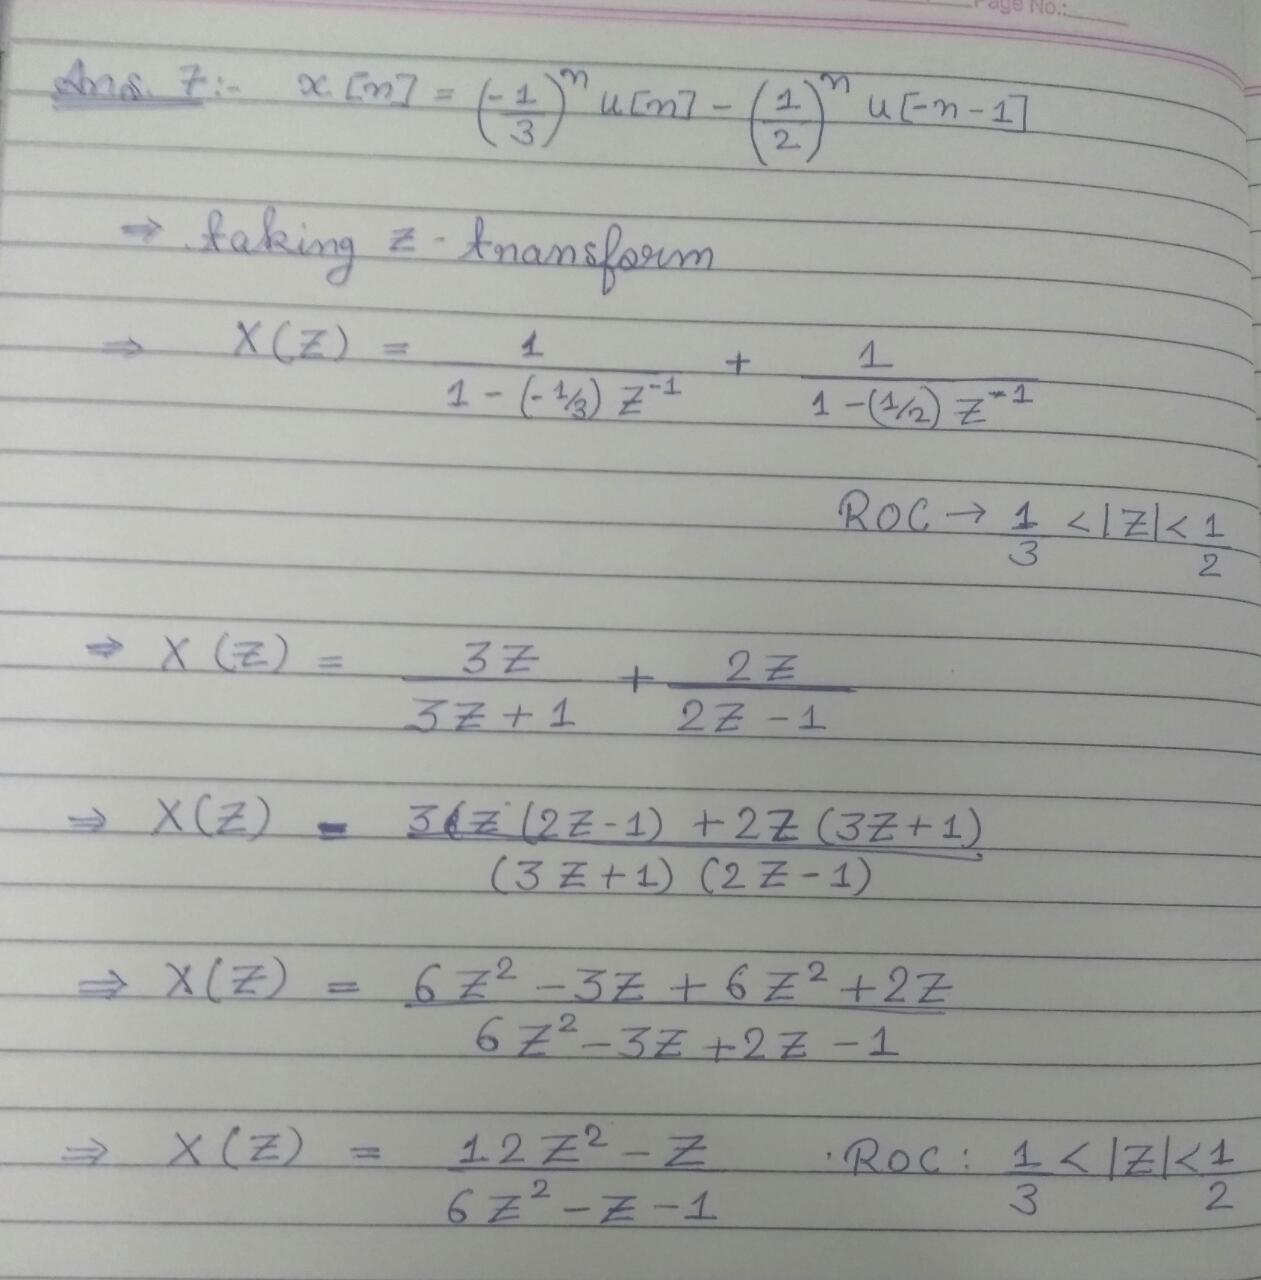

In [22]:
# function to generate step sequence u[n].
def step_sample(a,c,n):
    unit =[]
    for sample in n:
        if sample < c:
            unit.append(0)
        else:
            unit.append(a**(sample+c))
    return unit

In [23]:
def X_z(omega):
    out = []
    for i in omega:
        z = np.exp(1j*i)
        f1 = (12*(z**2) - z)
        f2 = (6*(z**2) - z - 1)
        out.append(f1/f2)
    return out

In [24]:
# Generating the signal x[n].
a1 = -1/3
c1 = 0
a2 = 1/2
c2 = 1
n11 = np.arange(-10,10,1)

x1 = step_sample(a1,c1,n11)
x2 = np.flip(step_sample(a2,c2,n11))
x = np.array(x1)-np.array(x2)

# Calculating Z transform of x[n].

omega = np.arange(0,2*np.pi,0.01)
X_Z = X_z(omega)

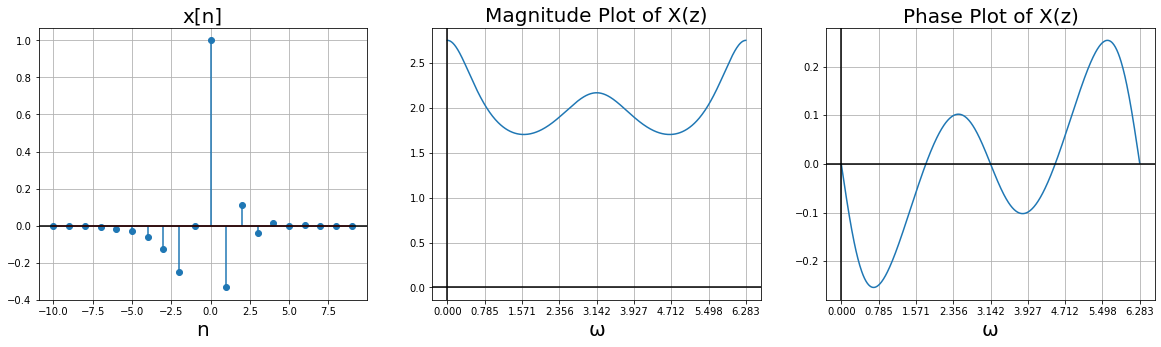

In [25]:
# Plot of original signal x[n], megnitude and phase spectra of X(z).
%matplotlib inline
fig,axes = plt.subplots(1,3,figsize=(20,5))

omega = np.arange(0,2*np.pi,0.01)

# Plot of x[n].

axes[0].stem(n11,x)
axes[0].set_xlabel('n',fontsize=20)
axes[0].set_title('x[n]',fontsize=20)
axes[0].axhline(color = "Black");
axes[0].grid()

# Magnitude plot of Z transform of x[n].

axes[1].plot(omega,np.absolute(X_Z))
axes[1].set_xlabel('ω',fontsize=20)
axes[1].set_title('Magnitude Plot of X(z)',fontsize=20)
axes[1].axhline(color = "Black")
axes[1].axvline(color = "Black")
axes[1].set_xticks([0,0.25*np.pi,0.5*np.pi,0.75*np.pi,np.pi,1.25*np.pi,1.5*np.pi,1.75*np.pi,2*np.pi])
axes[1].grid()

# Magnitude plot of fourier transform of x[n].

axes[2].plot(omega,np.angle(X_Z))
axes[2].set_xlabel('ω',fontsize=20)
axes[2].set_title('Phase Plot of X(z)',fontsize=20)
axes[2].axhline(color = "Black")
axes[2].axvline(color = "Black")
axes[2].set_xticks([0,0.25*np.pi,0.5*np.pi,0.75*np.pi,np.pi,1.25*np.pi,1.5*np.pi,1.75*np.pi,2*np.pi])
axes[2].grid()

<IPython.core.display.Javascript object>


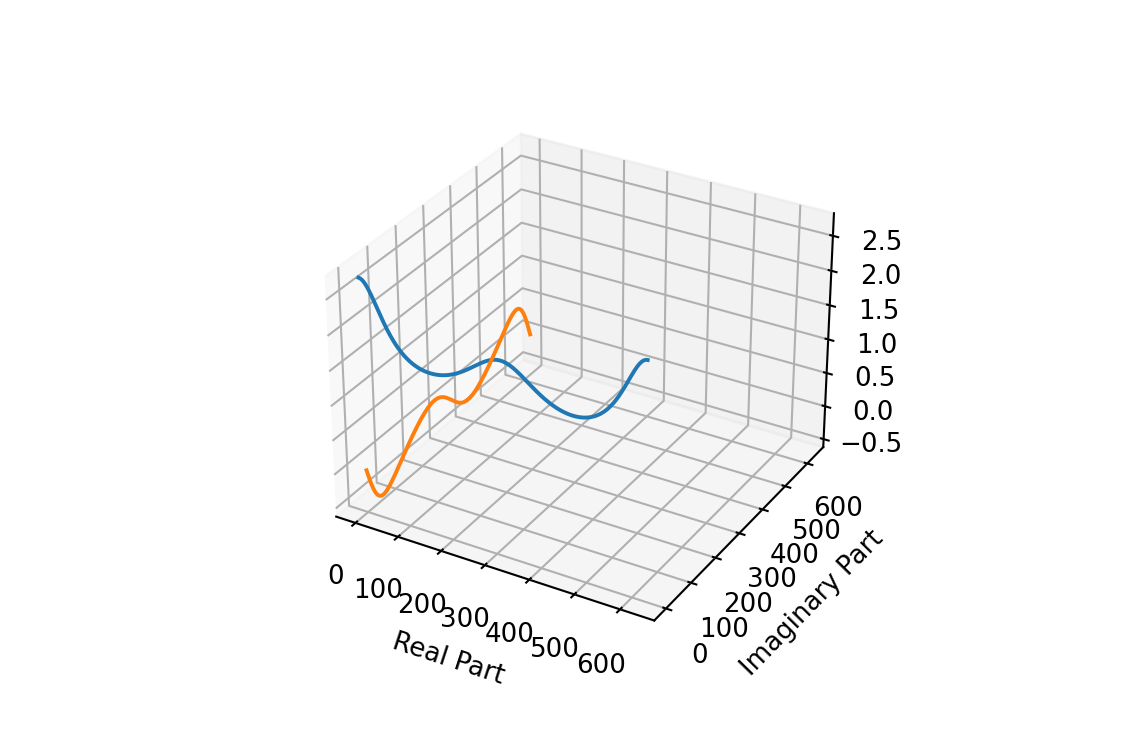

In [26]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 150
fig = plt.figure()
axes = fig.add_subplot(projection='3d')

X_Z_R = np.real(X_Z)
X_Z_I = np.imag(X_Z)
x_range = np.arange(0,len(X_Z_R),1)
y_range = np.arange(0,len(X_Z_I),1)

axes.plot(x_range,X_Z_R,zdir = 'y')
axes.plot(y_range,X_Z_I,zdir = 'x')
axes.set_xlabel("Real Part");
axes.set_ylabel("Imaginary Part");

(b) Find the Region of Convergence (ROC) of X(z) (calculate manually). Plot and visualize the poles, zeros and ROC of X(z) on a single subplot (for plotting ROC, draw circles and shade the appropriate region).

In [27]:
def Circle(r):
    omega = np.arange(0,2*np.pi,0.01)
    x = r*np.cos(omega)
    y = r*np.sin(omega)
    return x,y

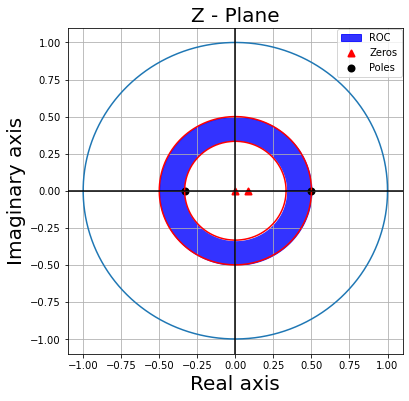

In [28]:
%matplotlib inline
fig = plt.subplots(figsize=(6,6))

# Calculating ploes and zeros of X(z).
NUM = [12,-1,0]
DEN = [6,-1,-1]
[Z,P,K] = signal.tf2zpk(NUM, DEN)

# Calculating real and imaginary part of zeros.
Z_real = np.real(Z)
Z_imag = np.imag(Z)

# Calculating real and imaginary part of ploes.
P_real = np.real(P)
P_imag = np.imag(P)

# Generating unit circle.
r = 1
circ = Circle(r)

# Generating circle.
P_1 = np.absolute(P[0])
circ_p_1 = Circle(P_1)

# Generating circle.
P_2 = np.absolute(P[1])
circ_p_2 = Circle(P_2)

# Plot
plt.plot(circ[0],circ[1])
plt.plot(circ_p_1[0],circ_p_1[1], color='red')
plt.plot(circ_p_2[0],circ_p_2[1],color='red')
plt.fill_between(circ_p_1[0],circ_p_1[1], color='blue', alpha=0.8,label='ROC')
plt.fill_between(circ_p_2[0],circ_p_2[1], color='white', alpha=1)
plt.scatter(Z_real,Z_imag,color = 'red',linewidths = 2,marker ="^",label='Zeros')
plt.scatter(P_real,P_imag,color = 'black',linewidths = 2,label='Poles')
plt.xlabel('Real axis',fontsize=20)
plt.ylabel('Imaginary axis',fontsize=20)
plt.title('Z - Plane',fontsize=20)
plt.axhline(color = "Black")
plt.axvline(color = "Black")
plt.grid()
plt.legend(loc=(0.805,0.85))

8. For the z-transform, H(z), is given by:

                       H(z) = 18z^3/(18z^3 + 3z^2 − 4z − 1)                 ..............(8)
                       
   (a) Determine and plot the zeros and poles of H(z). Also, plot its magnitude and phase spectra.

In [29]:
# Function for H(z).
def H(omega):
    out = []
    for i in omega:
        z = np.exp(1j*i)
        f1 = 18*(z**3)
        f2 = (18*(z**3) + 3*(z**2) - 4*z - 1)
        out.append(f1/f2)
    return out

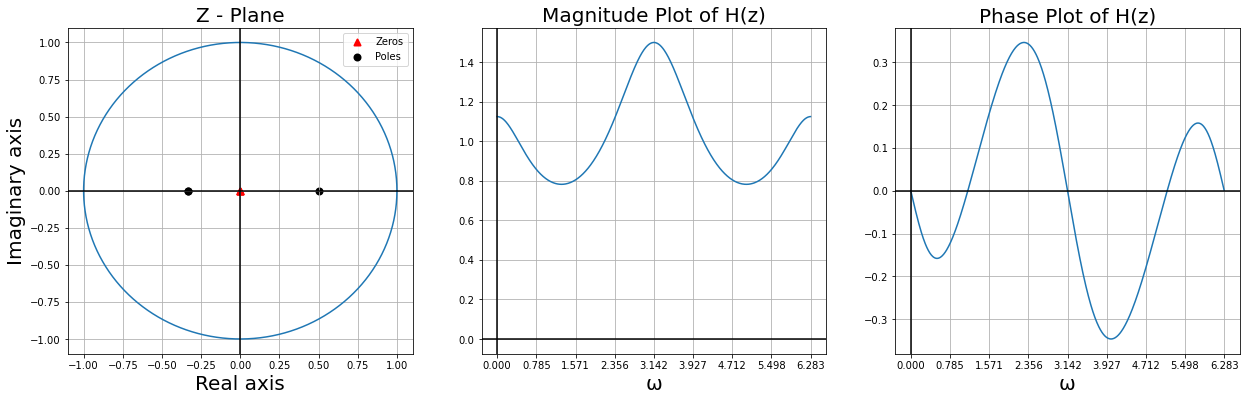

In [30]:
%matplotlib inline
fig, axes = plt.subplots(1,3 ,figsize=(21,6))

# Calculating ploes and zeros of H(z).
num = [18,0,0,0]
den = [18,3,-4,-1]
[z,p,k]=signal.tf2zpk(num, den)

# Calculating real and imaginary part of zeros.
z_real = np.real(z)
z_imag = np.imag(z)

# Calculating real and imaginary part of ploes.
p_real = np.real(p)
p_imag = np.imag(p)

# Generating unit circle.
r = 1
circ = Circle(r)

# Plot of poles and zeros.
axes[0].plot(circ[0],circ[1])
axes[0].scatter(z_real,z_imag,color = 'red',linewidths = 2,marker ="^",label='Zeros')
axes[0].scatter(p_real,p_imag,color = 'black',linewidths = 2,label='Poles')
axes[0].set_xlabel('Real axis',fontsize=20)
axes[0].set_ylabel('Imaginary axis',fontsize=20)
axes[0].set_title('Z - Plane',fontsize=20)
axes[0].axhline(color = "Black")
axes[0].axvline(color = "Black")
axes[0].grid()
axes[0].legend()

# Calculating the H(z).
omega = np.arange(0,2*np.pi,0.01)
H_z = H(omega)

# Magnitude plot of H(z).
axes[1].plot(omega,np.absolute(H_z))
axes[1].set_xlabel('ω',fontsize=20)
axes[1].set_title('Magnitude Plot of H(z)',fontsize=20)
axes[1].axhline(color = "Black")
axes[1].axvline(color = "Black")
axes[1].set_xticks([0,0.25*np.pi,0.5*np.pi,0.75*np.pi,np.pi,1.25*np.pi,1.5*np.pi,1.75*np.pi,2*np.pi])
axes[1].grid()

# Magnitude plot of fourier transform of x[n].
axes[2].plot(omega,np.angle(H_z))
axes[2].set_xlabel('ω',fontsize=20)
axes[2].set_title('Phase Plot of H(z)',fontsize=20)
axes[2].axhline(color = "Black")
axes[2].axvline(color = "Black")
axes[2].set_xticks([0,0.25*np.pi,0.5*np.pi,0.75*np.pi,np.pi,1.25*np.pi,1.5*np.pi,1.75*np.pi,2*np.pi])
axes[2].grid()

(b) Using partial fraction expansion, determine the ROC and inverse z-transform of H(z).

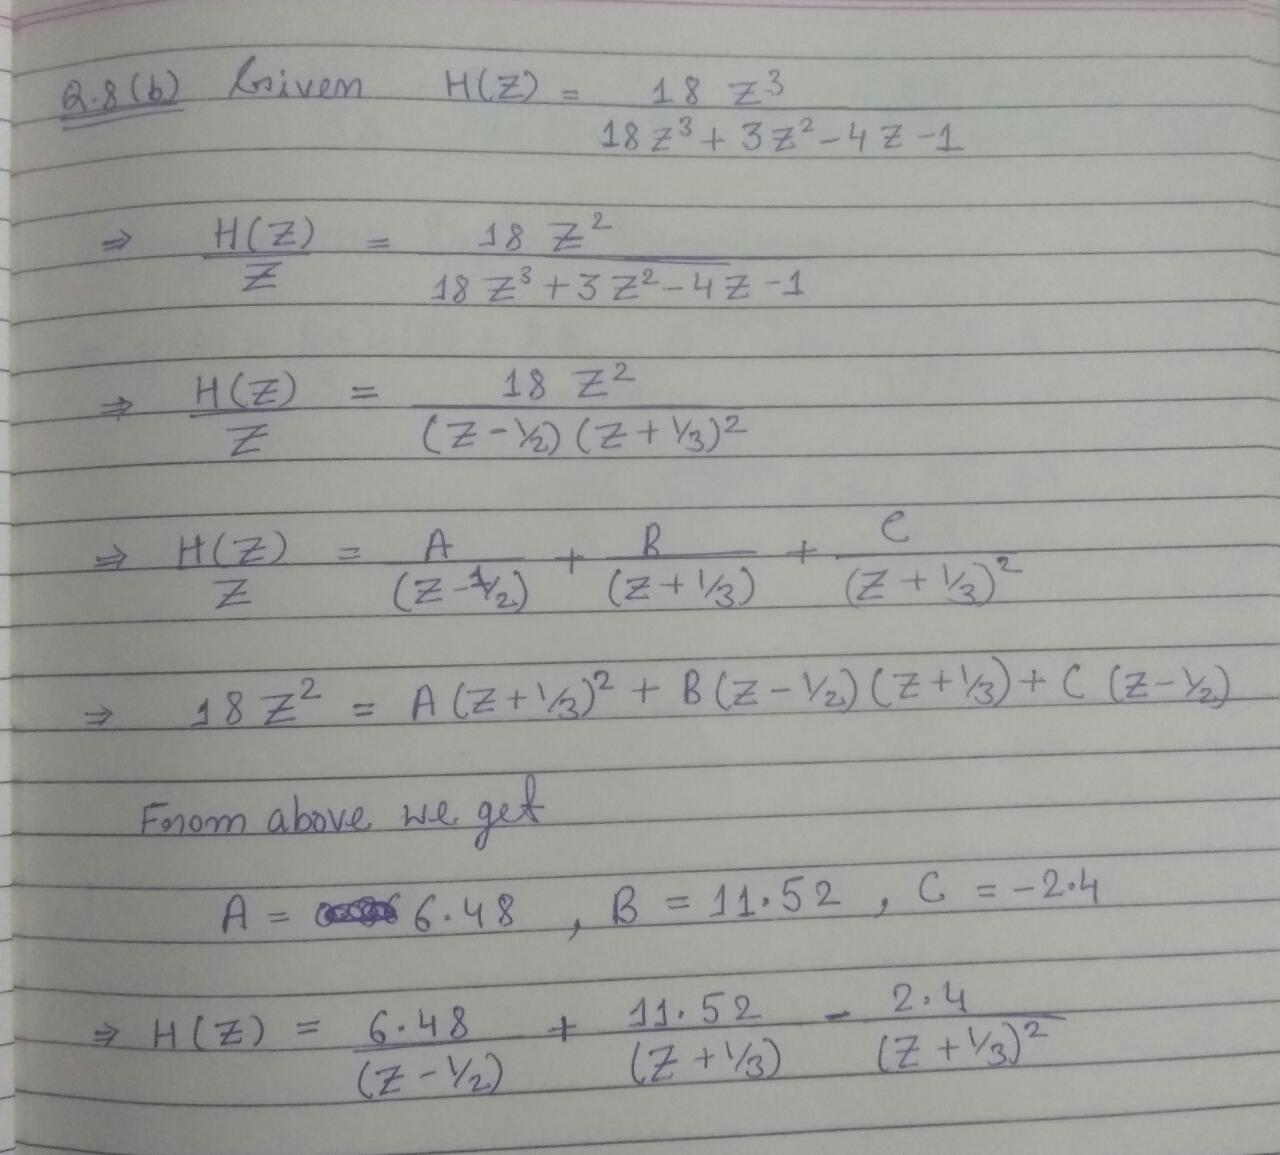

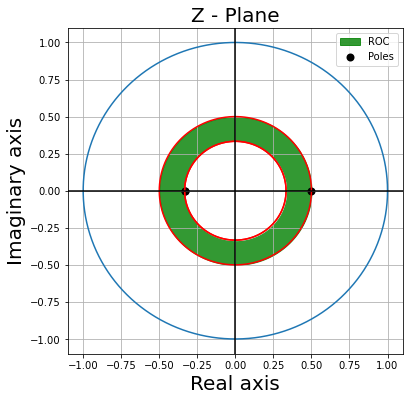

In [31]:
%matplotlib inline
fig = plt.subplots(figsize=(6,6))

# Calculating partial fraction of H(z).
num = [18,0,0,0]
den = [18,3,-4,-1]
[r,p,K] = signal.residuez(num, den)

# Calculating real and imaginary part of ploes.
p_real = np.real(p)
p_imag = np.imag(p)

# Generating unit circle.
r = 1
circ = Circle(r)

# Generating circle.
p_1 = np.absolute(p[0])
circ_p_1 = Circle(p_1)

# Generating circle.
p_2 = np.absolute(p[1])
circ_p_2 = Circle(p_2)

# Generating circle.
p_3 = np.absolute(p[2])
circ_p_3 = Circle(p_3)

# Plot
plt.plot(circ[0],circ[1])
plt.plot(circ_p_1[0],circ_p_1[1], color='red')
plt.plot(circ_p_2[0],circ_p_2[1],color='red')
plt.plot(circ_p_3[0],circ_p_3[1],color='red')
plt.fill_between(circ_p_3[0],circ_p_3[1], color='green', alpha=0.8,label='ROC')
plt.fill_between(circ_p_2[0],circ_p_2[1], color='white', alpha=1)
plt.scatter(p_real,p_imag,color = 'black',linewidths = 2,label='Poles')
plt.xlabel('Real axis',fontsize=20)
plt.ylabel('Imaginary axis',fontsize=20)
plt.title('Z - Plane',fontsize=20)
plt.axhline(color = "Black")
plt.axvline(color = "Black")
plt.grid()
plt.legend()

9. One of the uses of the Laplace transform is the solution of differential equations.

   (a) Suppose you are given the ordinary differential equation that represents an LTI system,
            
                   y(2)(t) + 0.5y(1)(t) + 0.15y(t) = x(t), t ≥ 0          .....................(9)
            
    where y(t) is the output and x(t) is the input of the system, y(1)(t) and y(2)(t) are first and second order derivatives with respect to t. The input is causal, i.e., x(t) = 0, t < 0. What should be the initial conditions for the system to be LTI? Find Y (s) for those initial conditions.

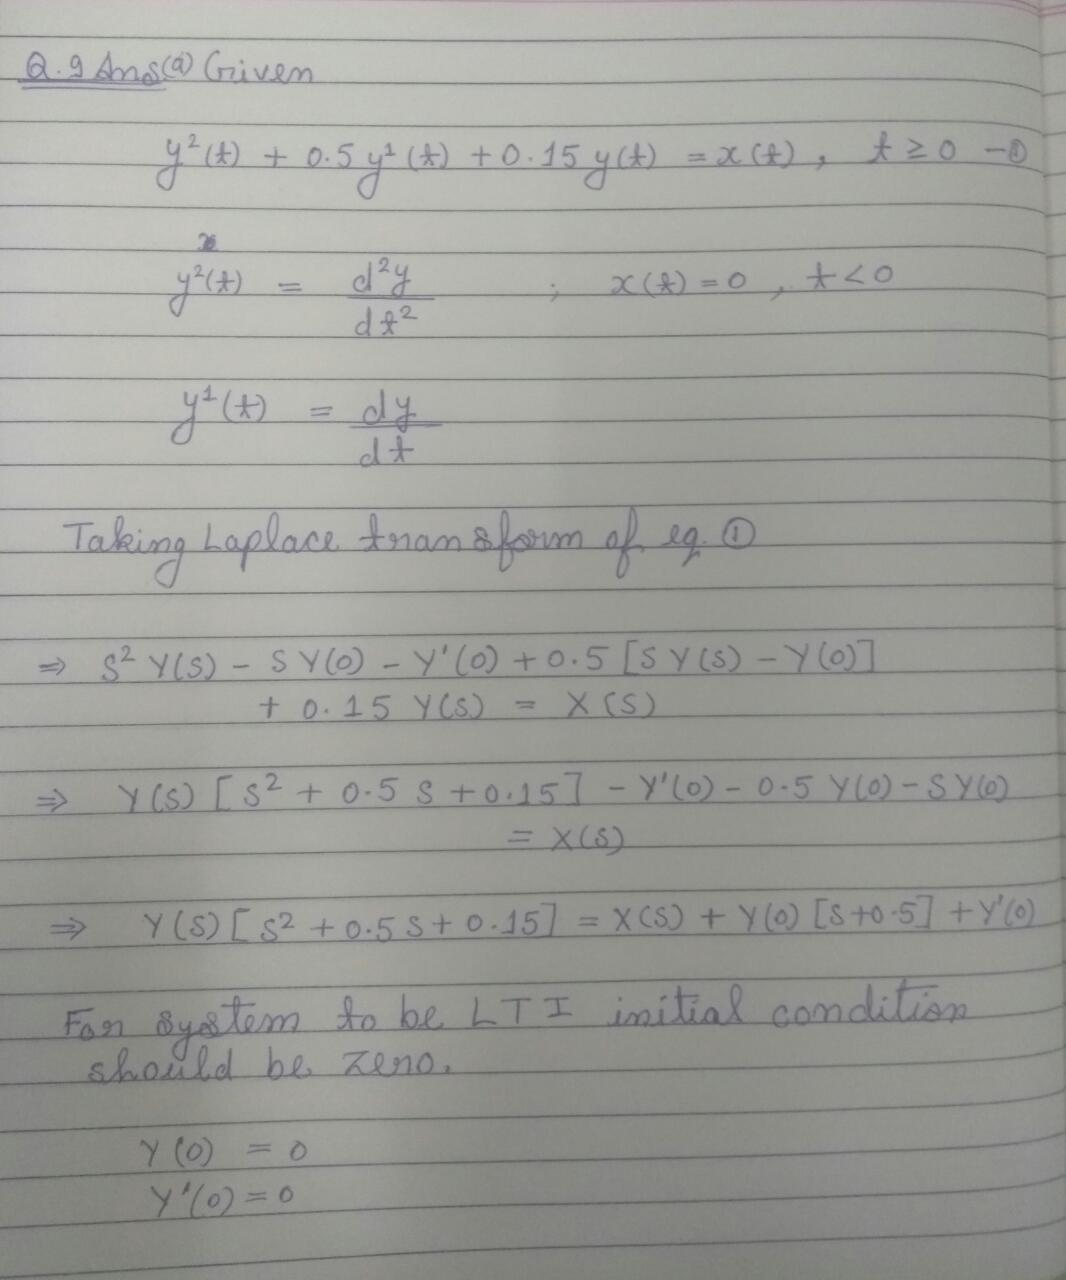

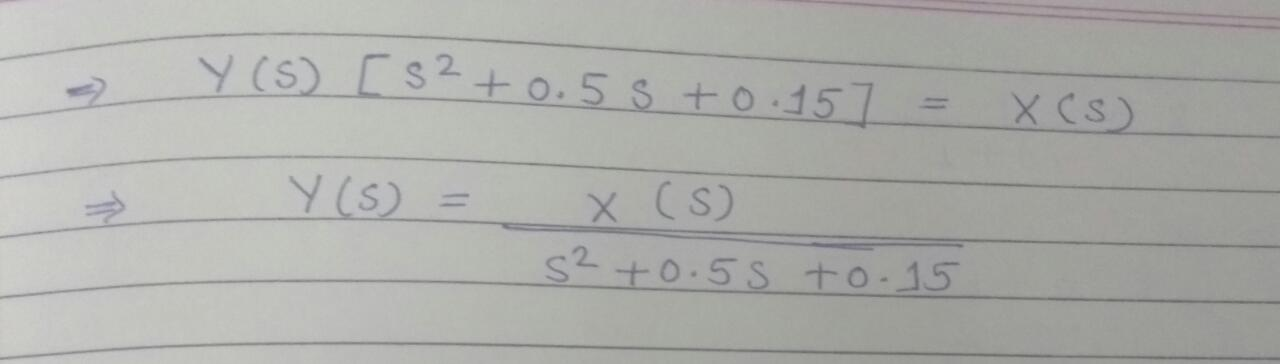

(b) If y(1)(0) = 1 and y(0) = 1 are the initial conditions for the above ordinary differential equation, find Y (s). If the input to the system is doubled, i.e., the input is 2x(t), is Y (s) doubled? Is the system linear?

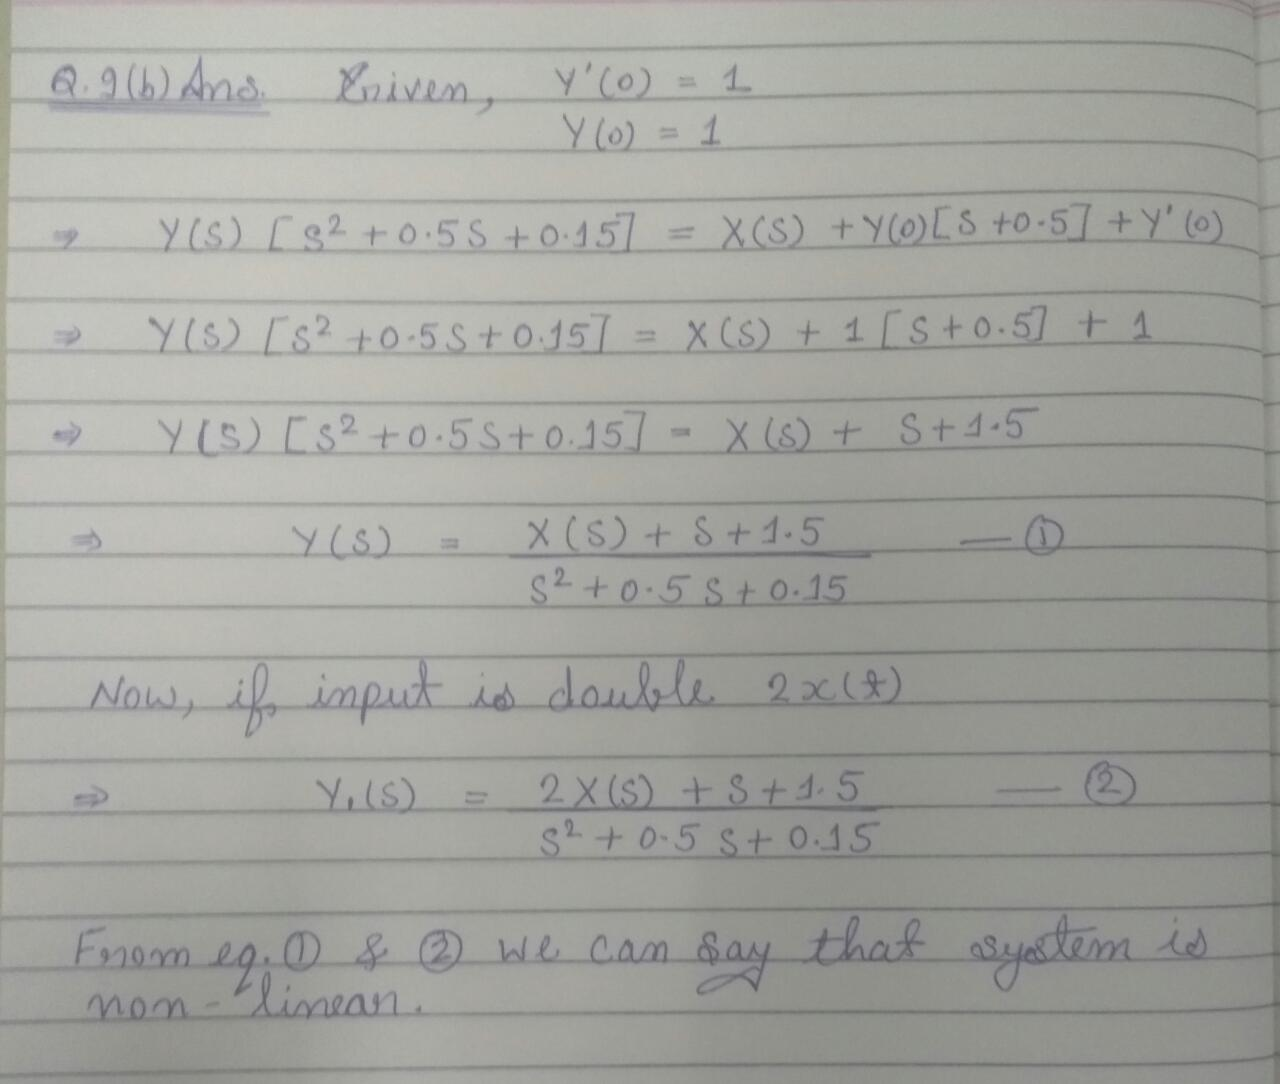

(c) Find the solutions of the ordinary differential equation when the input is u(t) and 2u(t), with the initial conditions as given above. Compare the solutions and verify your response in (b).

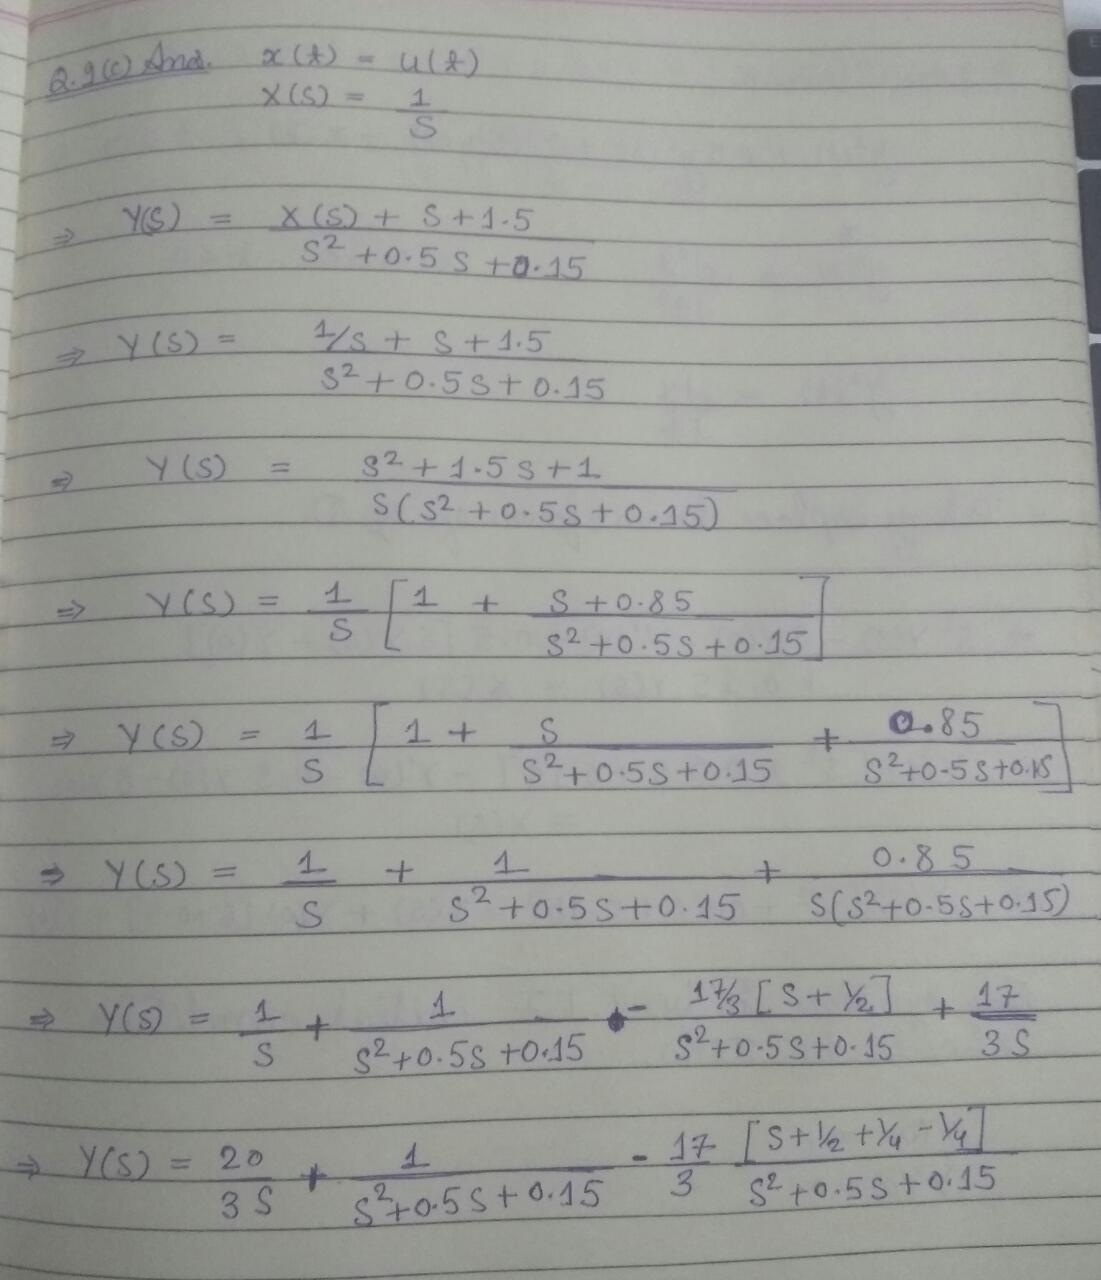

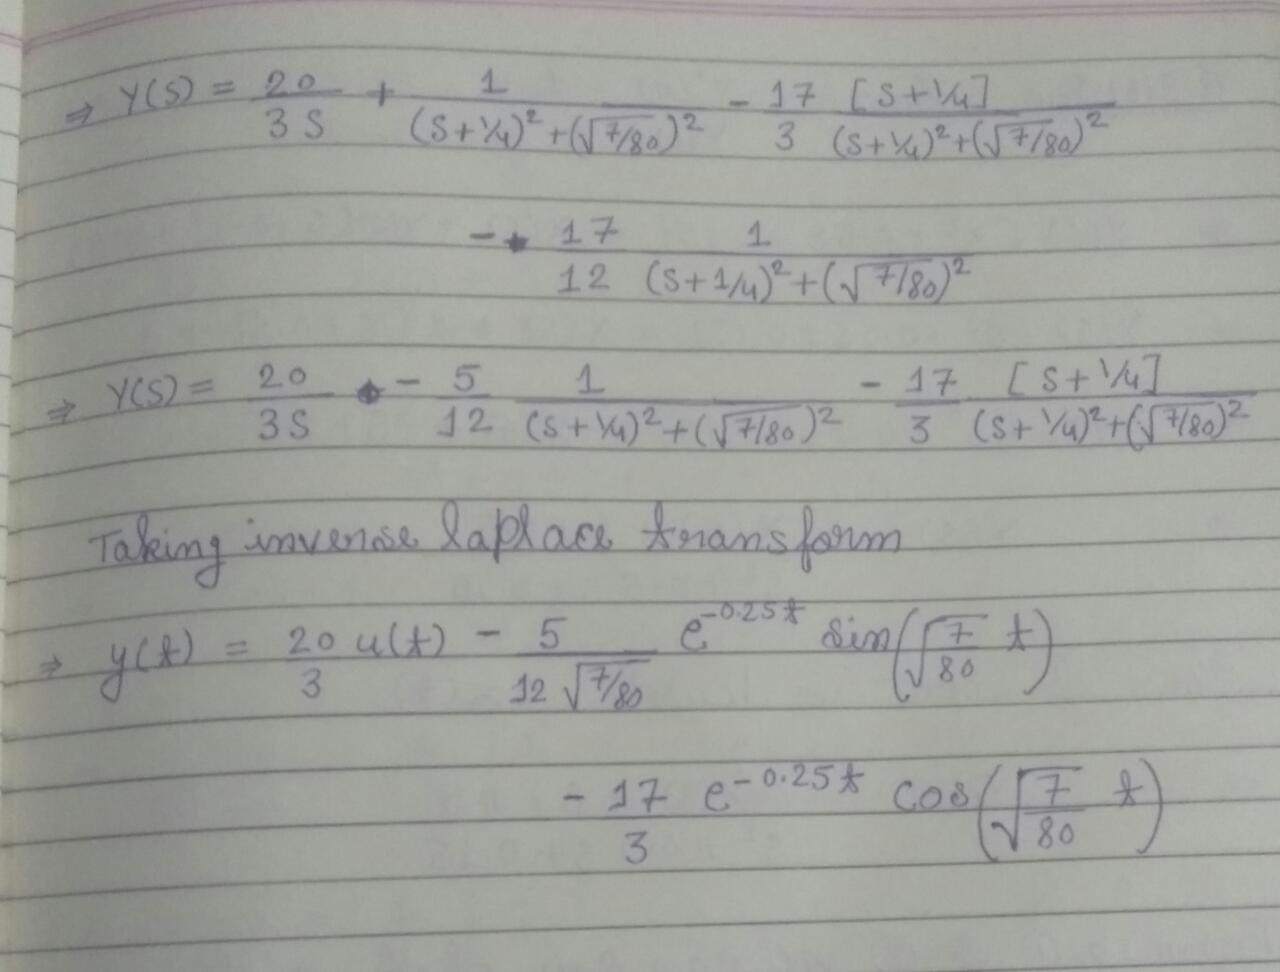

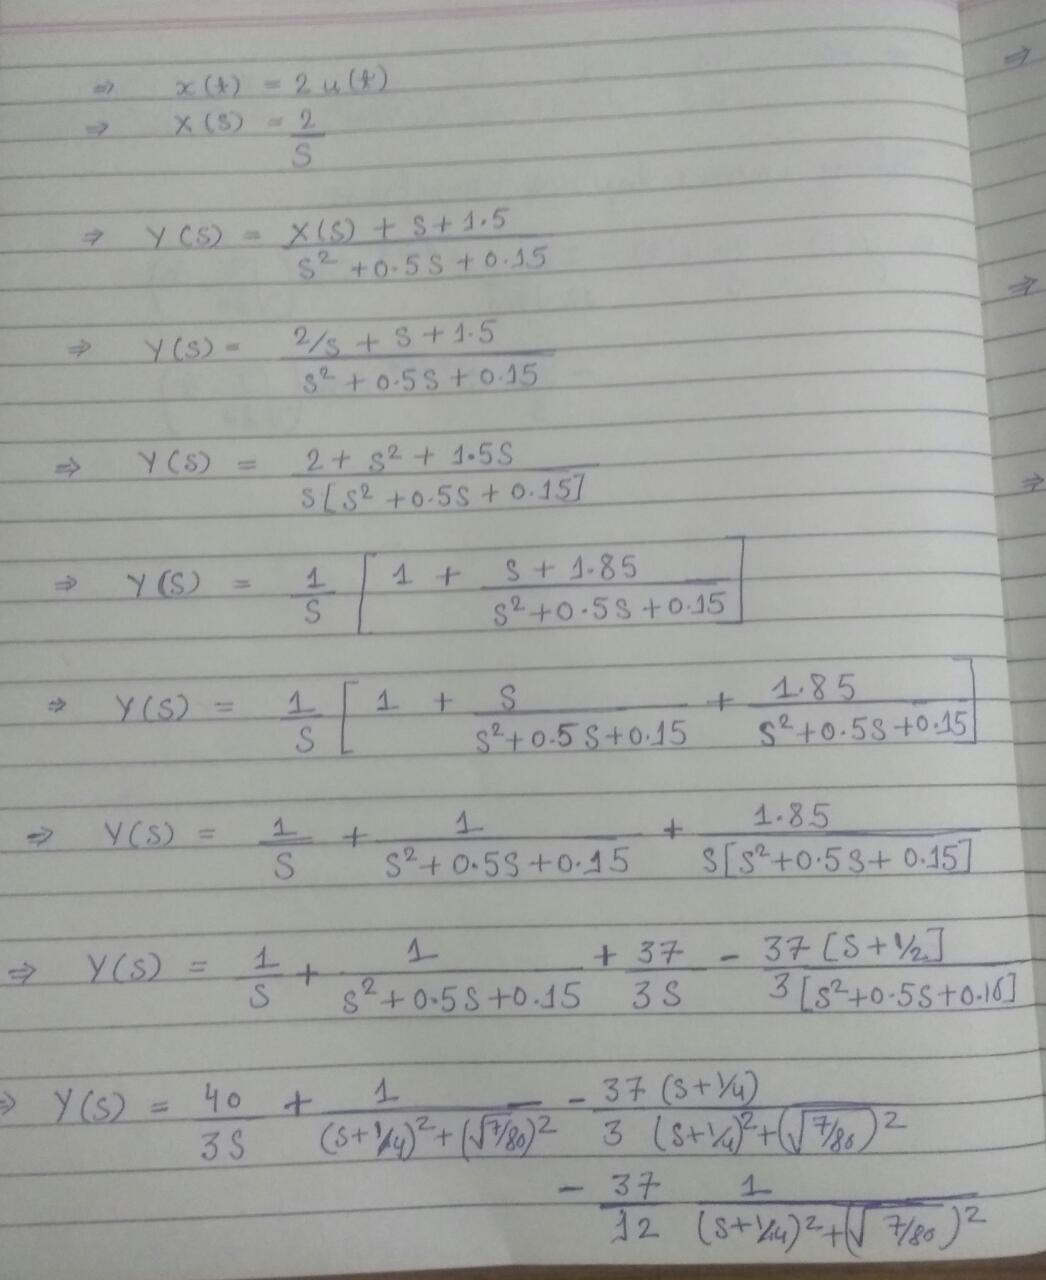

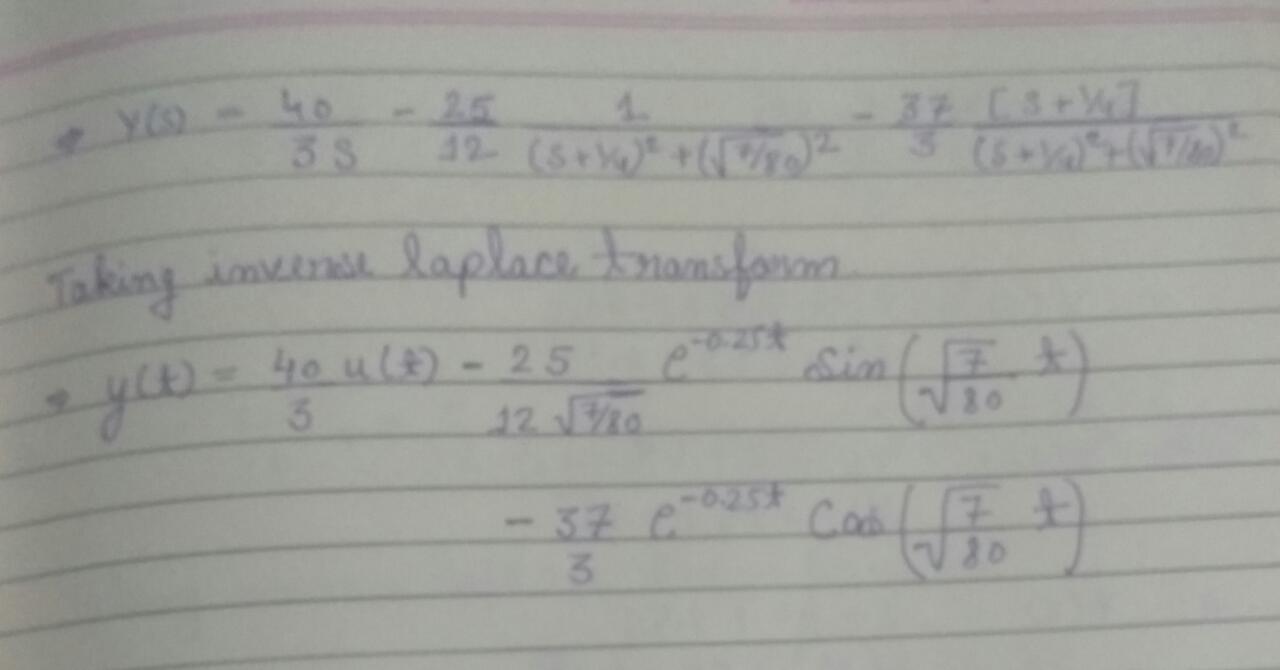

10. We are given the following five facts about a real signal x(t) with Laplace transform X(s):
   
    • X(s) has exactly two poles.
    
    • X(s) has no zeros in the finite s-plane.
    
    • X(s) has a pole at s = -1 + j.
    
    • e^2t x(t) is not absolutely integrable.
    
    • X(0) = 8.
    
    Determine X(s) and specify its region of convergence. Also plot its poles.

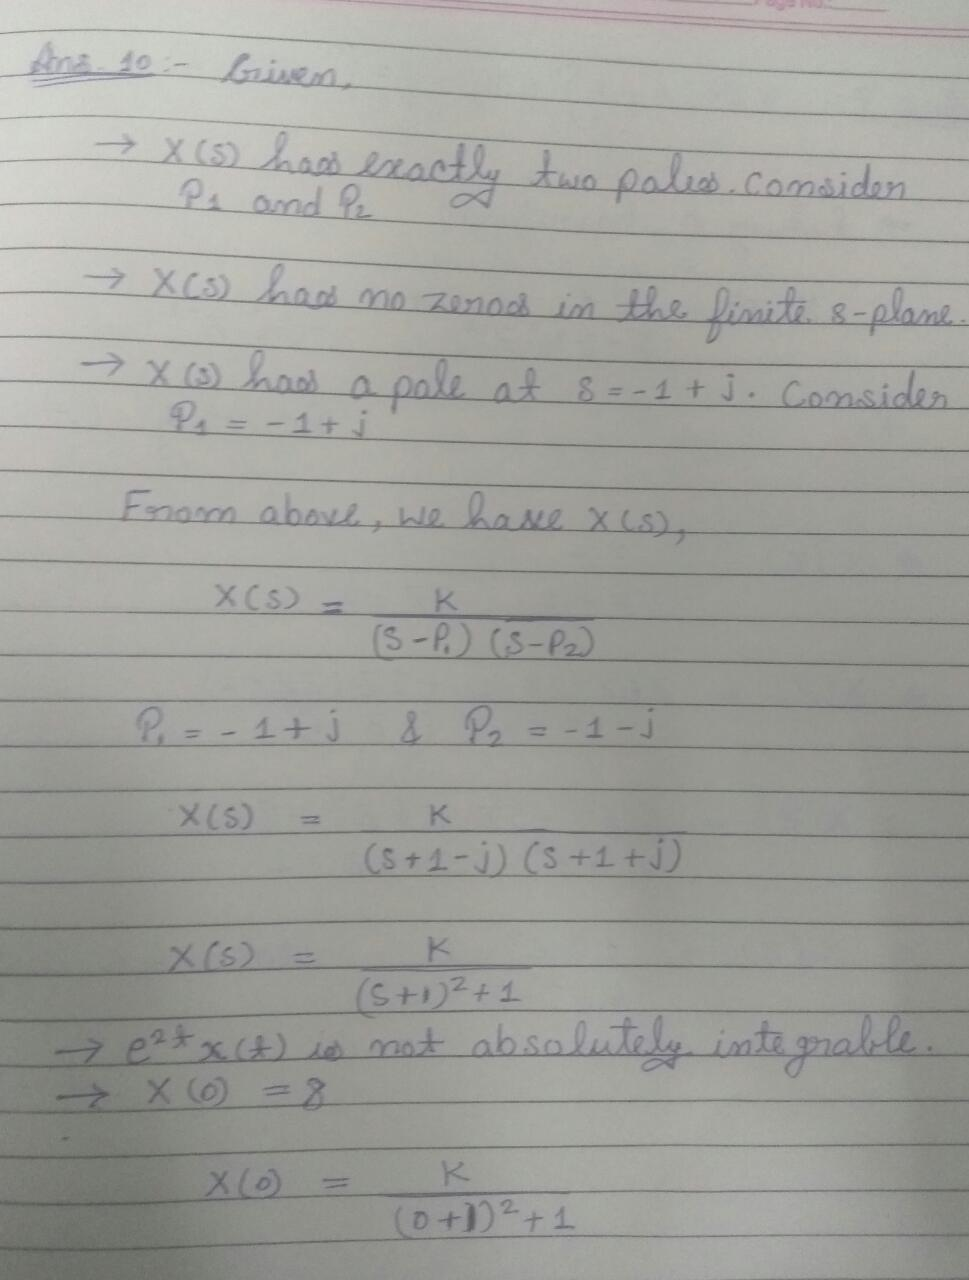

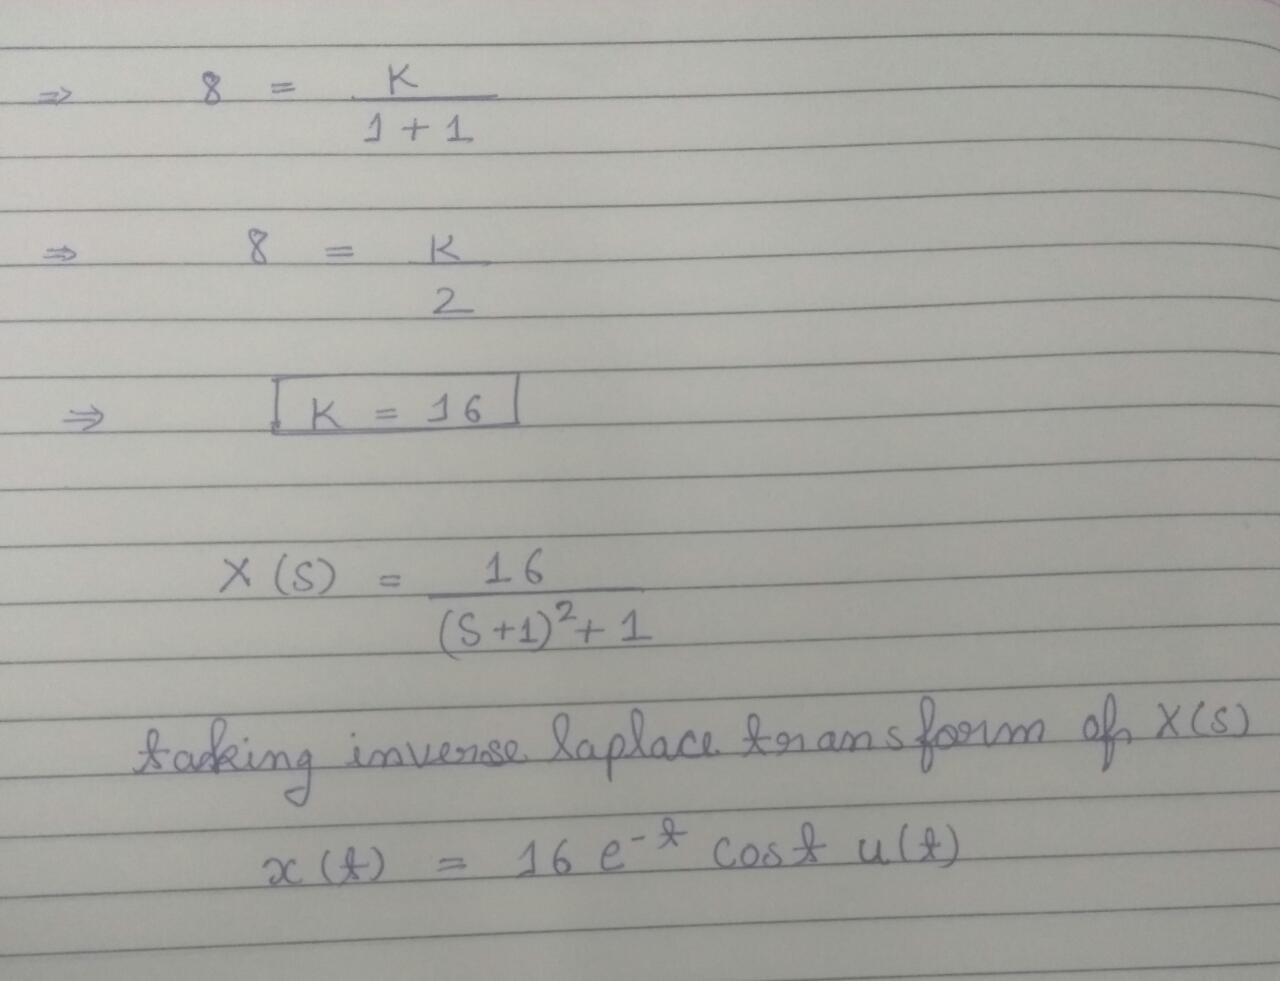

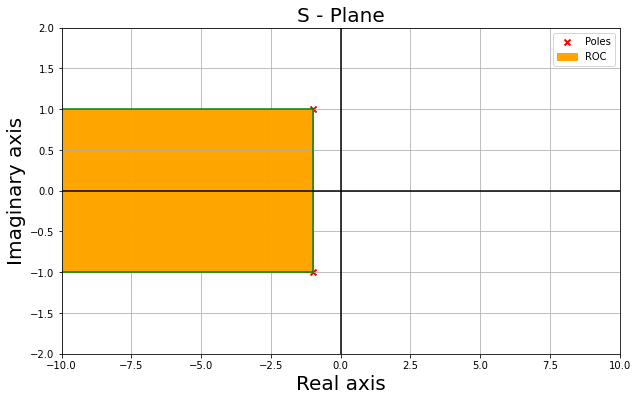

In [32]:
# Calculating real and imaginary part of ploes.
%matplotlib inline
fig = plt.subplots(figsize=(10,6))

p = [-1+1j,-1-1j]
p_real = np.real(p)
p_imag = np.imag(p)

plt.scatter(p_real,p_imag,color = 'red',linewidths = 2,marker ="x",label='Poles')
plt.plot(p_real,p_imag,'g')
plt.plot([-10,p_real[0]],[p_imag[1],p_imag[1]],'g')
plt.plot([-10,p_real[0]],[p_imag[0],p_imag[0]],'g')
plt.fill_between([-10,-1],[-1,-1], color='orange', alpha=1,label='ROC')
plt.fill_between([-10,-1],[1,1], color='orange', alpha=1)
plt.xlabel('Real axis',fontsize=20)
plt.ylabel('Imaginary axis',fontsize=20)
plt.title('S - Plane',fontsize=20)
plt.axhline(color = "Black")
plt.axvline(color = "Black")
plt.xlim(-10,10)
plt.ylim(-2,2)
plt.grid()
plt.legend()